# 5 Evaluation des modeles 


Lors de l'evaultion des models de predictions, on utilise differents indicateurs appelé metriques pour analyser la performance du modéle. 
Nous allons utiliser trois différents métriques pour évaluer les modèles de machine learning décrit dans la parite 4. Car chaque métrique fournit une mesure différente de la performance du modèle et peut donner des informations supplémentaires sur les forces et les faiblesses du modèle.<br>
Nous allons utilier l'erreur quadratique moyenne (RMSE), le coefficient de détermination R2 et le coefficient de corrélation de Spearman. 

### RMSE : L'erreur quadratique moyenne 

Le RMSE est une mesure de l'erreur moyenne quadratique entre les valeurs prédites et les valeurs réelles. Il s'agit de la racine carrée de la moyenne des erreurs quadratiques, ce qui permet de quantifier la différence entre les valeurs prédites et observées. Un RMSE plus faible indique une meilleure précision du modèle. Toutefois, le RMSE étant sensible aux valeurs extrêmes, il peut parfois donner une image trompeuse de la performance d'un modèle.

### R2 : Coefficient de détermination

Le R2 est une mesure statistique qui indique la proportion de la variance des données expliquée par le modèle de régression. Il varie entre 0 et 1, où 1 indique que le modèle explique parfaitement la variance des données et 0 signifie qu'il n'explique pas du tout la variance. Un R2 élevé (proche de 1) indique que le modèle s'ajuste bien aux données, tandis qu'un R2 faible (proche 0) suggère un ajustement médiocre.

### Coefficient de corrélation de Spearman 

Le coefficient de corrélation de Spearman mesure la force et la direction de la relation monotone entre deux variables. Il varie entre -1 et 1. Une valeur proche de 1 indique une relation monotone positive forte entre les variables, tandis qu'une valeur proche de -1 indique une relation monotone négative forte. Une valeur proche de 0 suggère l'absence de corrélation monotone. Contrairement à la corrélation de Pearson, le coefficient de Spearman est moins sensible aux valeurs extrêmes et peut être utilisé pour évaluer la relation entre des variables non linéaires.

## Réalisation

Nous allons realiser les differents modeles de regression dans 6 fichiers differents :
- LinearRegression.ipynb
- Ridge.ipynb
- Lasso.ipynb
- KNeighborsRegressor.ipynd
- DecisionTreeRegressor.ipynb
- RandomForestRegressor.ipynb

Nous utilisons des transformers pour le traitements des données d'entrée.
Puis le modele pour effectuer les predictions.
Nous allons utiliser la classe `Pipeline` de Scikit-learn pour enchainer les traitement et la modelisation afin 

## Conlcusion

In [1]:
import pickle

results = {}

model_names = ['DecisionTreeRegressor', 'LinearRegression', 'KNeighborsRegressor', 'Lasso', 'RandomForestRegressor', 'Ridge']

for model_name in model_names:
    with open('results/' + model_name + '.pkl', 'rb') as f:
        results[model_name] = pickle.load(f)



# France

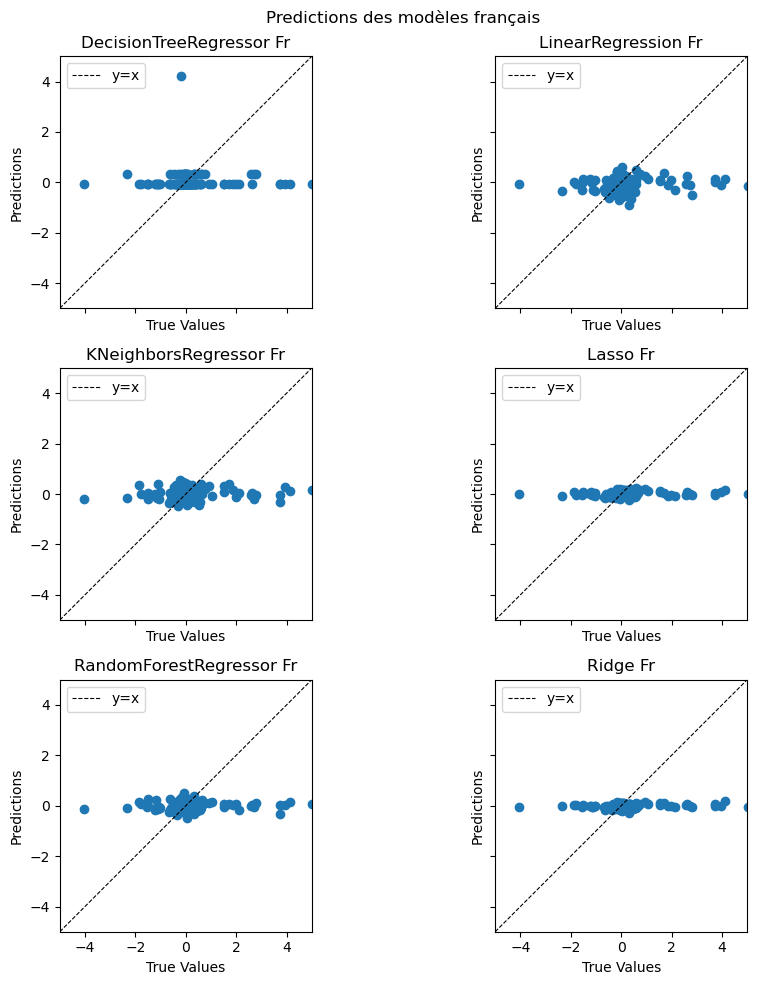

In [2]:
import matplotlib.pyplot as plt

n = 5

def plot_predictions(results, country):
    fig, axs = plt.subplots(3,2, figsize=(10,10), sharex=True, sharey=True)

    axs = axs.flatten()

    for i, model_name in enumerate(model_names):
        y_test = results[model_name][country]['y_test']
        y_pred = results[model_name][country]['y_pred']
        axs[i].scatter(y_test, y_pred)
        axs[i].set_title(model_name + ' ' +country.capitalize())
        axs[i].set_aspect('equal')
        # x = y (diagonal) black dotted line
        axs[i].axline((0,0), slope=1, color='k', linestyle='--', label='y=x', linewidth=0.8)
        axs[i].legend()
        axs[i].set_xlabel('True Values')
        axs[i].set_ylabel('Predictions')

        axs[i].set_ylim([-n, n])
        axs[i].set_xlim([-n, n])

    plt.subplots_adjust(hspace=0.4)
    plt.suptitle('Predictions des modèles français');
    plt.tight_layout()

plot_predictions(results, 'fr')

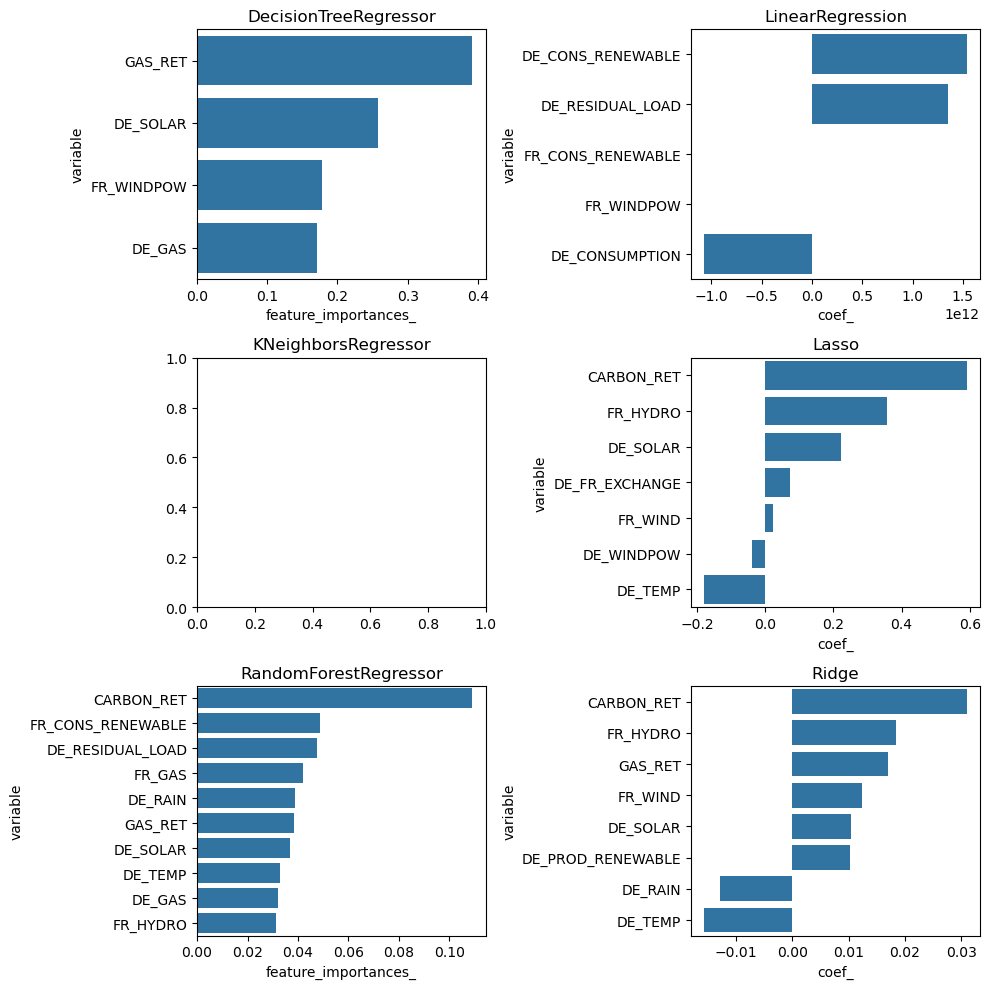

In [3]:
import seaborn as sns
country = 'fr'
def plot_importances(results, country):
    fig, axs = plt.subplots(3,2, figsize=(10,10))

    axs = axs.flatten()

    for i, model_name in enumerate(model_names):
        if model_name not in ['KNeighborsRegressor']:
            coef_df = results[model_name][country]['importance']
            if model_name in ['LinearRegression', 'Ridge', 'Lasso']:
                sns.barplot(x=f'coef_', y='variable', data=coef_df, color='tab:blue', ax=axs[i])
            elif model_name in ['DecisionTreeRegressor', 'RandomForestRegressor']:
                sns.barplot(x=f'feature_importances_', y='variable', data=coef_df, color='tab:blue', ax=axs[i])
        axs[i].set_title(model_name)
    plt.tight_layout()

plot_importances(results, 'fr')
    

# Classement des meilleurs modèles

In [4]:
def metrics_ranks(results, country):
    all_r2 = []
    all_rmse = []
    all_spearman = []
    for model_name in model_names:
        r2 = results[model_name][country]['r2']
        rmse = results[model_name][country]['rmse']
        spearman = results[model_name][country]['spearman']
        r2_tuple = (model_name, r2)
        rmse_tuple = (model_name, rmse) 
        spearman_tuple = (model_name, spearman)
        all_r2.append(r2_tuple)
        all_rmse.append(rmse_tuple)
        all_spearman.append(spearman_tuple)

    sorted_r2 = sorted(all_r2, key=lambda x: x[1], reverse=True)
    sorted_rmse = sorted(all_rmse, key=lambda x: x[1])
    sorted_spearman = sorted(all_spearman, key=lambda x: x[1], reverse=True)



    print("R2 Ranking:")
    for i, (model_name, r2) in enumerate(sorted_r2, start=1):
        print(f"{i}. {model_name}: {r2:.3f} ")

    print("\nRMSE Ranking:")
    for i, (model_name, rmse) in enumerate(sorted_rmse, start=1):
        print(f"{i}. {model_name}: {rmse:.3f}")

    print("\nSpearman Ranking:")
    for i, (model_name, spearman) in enumerate(sorted_spearman, start=1):
        print(f"{i}. {model_name}: {spearman:.3f}")
        
metrics_ranks(results, 'fr')


R2 Ranking:
1. Ridge: -0.000 
2. Lasso: -0.003 
3. KNeighborsRegressor: -0.008 
4. RandomForestRegressor: -0.017 
5. LinearRegression: -0.040 
6. DecisionTreeRegressor: -0.088 

RMSE Ranking:
1. Ridge: 1.413
2. Lasso: 1.415
3. KNeighborsRegressor: 1.419
4. RandomForestRegressor: 1.425
5. LinearRegression: 1.441
6. DecisionTreeRegressor: 1.474

Spearman Ranking:
1. Lasso: 0.237
2. Ridge: 0.225
3. LinearRegression: 0.141
4. RandomForestRegressor: 0.110
5. DecisionTreeRegressor: 0.101
6. KNeighborsRegressor: 0.089


# Allemange

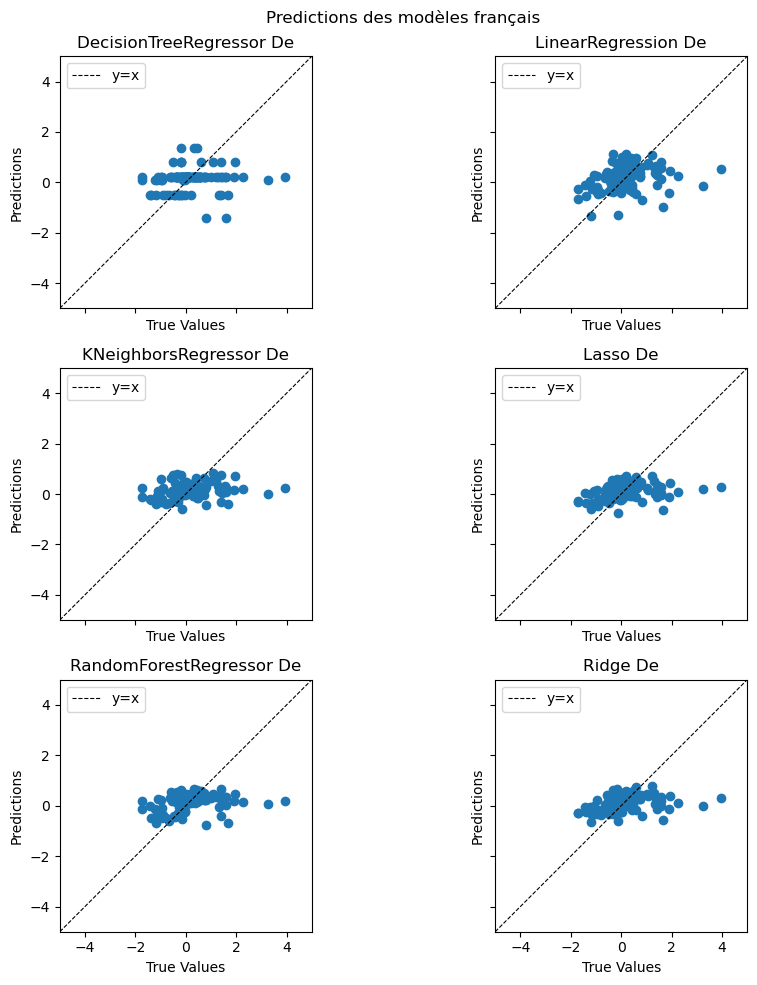

In [5]:
plot_predictions(results, 'de')

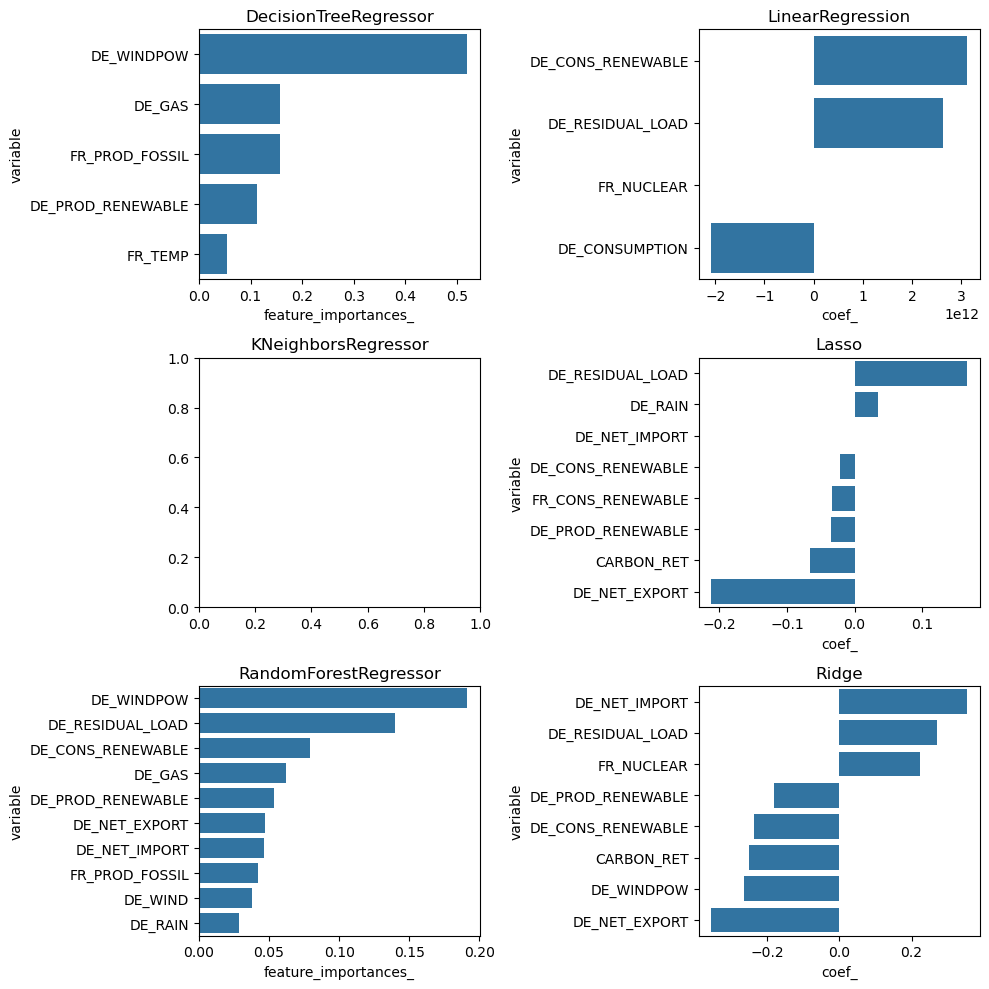

In [6]:
plot_importances(results, 'de')

In [7]:
metrics_ranks(results, 'de')

R2 Ranking:
1. Ridge: 0.045 
2. RandomForestRegressor: 0.035 
3. Lasso: 0.030 
4. KNeighborsRegressor: 0.024 
5. LinearRegression: -0.043 
6. DecisionTreeRegressor: -0.101 

RMSE Ranking:
1. Ridge: 1.043
2. RandomForestRegressor: 1.048
3. Lasso: 1.051
4. KNeighborsRegressor: 1.054
5. LinearRegression: 1.090
6. DecisionTreeRegressor: 1.120

Spearman Ranking:
1. Ridge: 0.356
2. Lasso: 0.324
3. LinearRegression: 0.322
4. RandomForestRegressor: 0.304
5. KNeighborsRegressor: 0.274
6. DecisionTreeRegressor: 0.240


Les meilleurs modèles pour la France et l'Allemange sont respectivement les modèles Ridge et RandomForestRegressor
<br>
Dans le fichier `5-2_Ridge.ipynd`, le meilleur modèle francais fait une prediciton sur les nouvelles données non labelisés, les resultats sont stockés dans le fichier `data/DataNew_y_FR.csv`.
Dans le fichier `5-6_RandomForestRegressor.ipynd`, le meilleur modèle allemand fait une prediciton sur les nouvelles données non labelisés, les resultats sont stockés dans le fichier `data/DataNew_y_DE.csv`.